In [1]:
import pandas as pd
import numpy as np
import textstat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, BayesianRidge, ElasticNetCV
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from dmba import regressionSummary

/Users/aminazimi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('/Users/aminazimi/Downloads/winequality-white.csv', sep=";")
df.describe()
#import the dataset
#no missing values
#all variables are numerical
#check the descriptive statistics of the features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


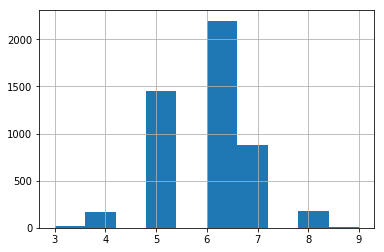

In [3]:
df.quality.hist()
plt.show()
#distribution of the outcome variable

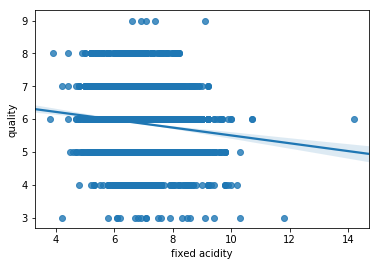

In [4]:
sns.regplot(x=df['fixed acidity'], y=df['quality'])
#checking for outliers in fixed acidity

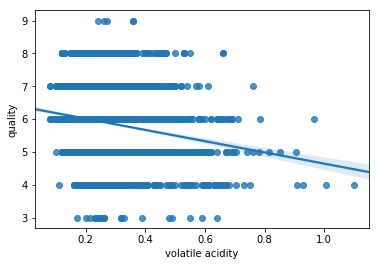

In [5]:
sns.regplot(x=df['volatile acidity'], y=df['quality'])
#checking for outliers in volatile acidity

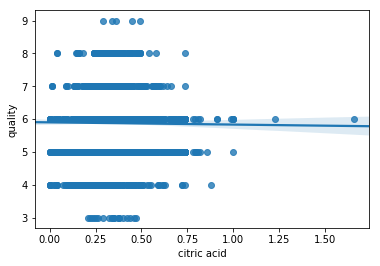

In [6]:
sns.regplot(x=df['citric acid'], y=df['quality'])
#checking for outliers in citric acid

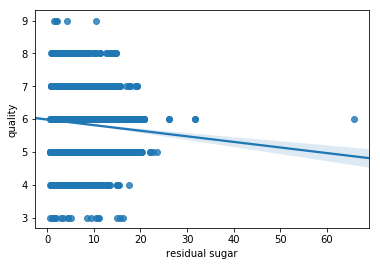

In [7]:
sns.regplot(x=df['residual sugar'], y=df['quality'])
#checking for outliers in residual sugar

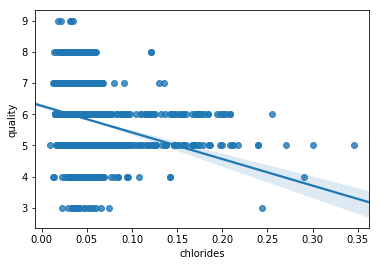

In [8]:
sns.regplot(x=df['chlorides'], y=df['quality'])
#checking for outliers in chlorides

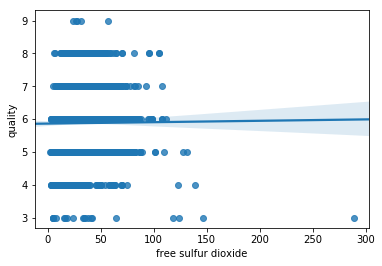

In [9]:
sns.regplot(x=df['free sulfur dioxide'], y=df['quality'])
#checking for outliers in free sulfur dioxide

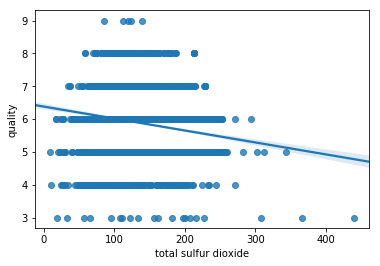

In [10]:
sns.regplot(x=df['total sulfur dioxide'], y=df['quality'])
#checking for outliers in total sulfur dioxide

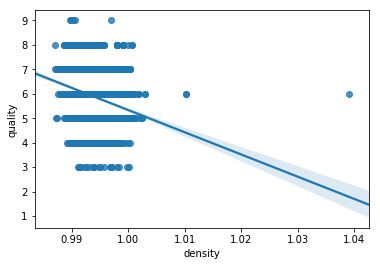

In [11]:
sns.regplot(x=df['density'], y=df['quality'])
#checking for outliers in density

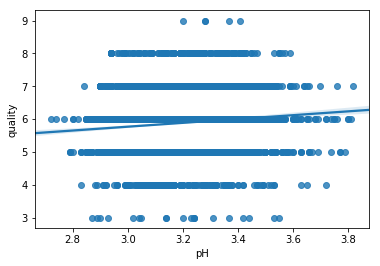

In [12]:
sns.regplot(x=df['pH'], y=df['quality'])
#checking for outliers in pH

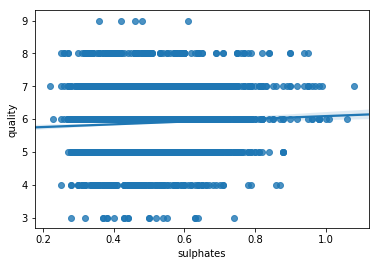

In [13]:
sns.regplot(x=df['sulphates'], y=df['quality'])
#checking for outliers in sulphates

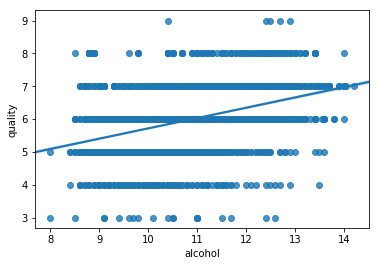

In [14]:
sns.regplot(x=df['alcohol'], y=df['quality'])
#checking for outliers in alcohol

In [15]:
df = df[df['fixed acidity'] < 14]
df = df[df['volatile acidity'] < 1.1]
df = df[df['citric acid'] < 1.5]
df = df[df['residual sugar'] < 60]
df = df[df['free sulfur dioxide'] < 250]
df = df[df['total sulfur dioxide'] < 400]
df = df[df['density'] < 1.02]
df
#removing all outliers from these variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
df.corr()
#correlation table

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.023010,0.290732,0.090121,0.023752,-0.047855,0.092699,0.271490,-0.429015,-0.018346,-0.122915,-0.116055
volatile acidity,-0.023010,1.000000,-0.152177,0.049747,0.070355,-0.094888,0.091417,0.008255,-0.035867,-0.038208,0.064840,-0.194037
citric acid,0.290732,-0.152177,1.000000,0.093472,0.117764,0.100306,0.125245,0.149807,-0.167113,0.061229,-0.080009,-0.010859
residual sugar,0.090121,0.049747,0.093472,1.000000,0.086554,0.316755,0.409155,0.833975,-0.199975,-0.030966,-0.459323,-0.100068
chlorides,0.023752,0.070355,0.117764,0.086554,1.000000,0.103905,0.199637,0.259082,-0.090685,0.016432,-0.360238,-0.210542
free sulfur dioxide,-0.047855,-0.094888,0.100306,0.316755,0.103905,1.000000,0.611360,0.314264,-0.005030,0.057120,-0.255363,0.017862
total sulfur dioxide,0.092699,0.091417,0.125245,0.409155,0.199637,0.611360,1.000000,0.544197,-0.000005,0.133251,-0.451267,-0.171505
density,0.271490,0.008255,0.149807,0.833975,0.259082,0.314264,0.544197,1.000000,-0.099712,0.071007,-0.801804,-0.316137
pH,-0.429015,-0.035867,-0.167113,-0.199975,-0.090685,-0.005030,-0.000005,-0.099712,1.000000,0.155213,0.120870,0.101173
sulphates,-0.018346,-0.038208,0.061229,-0.030966,0.016432,0.057120,0.133251,0.071007,0.155213,1.000000,-0.017931,0.054514


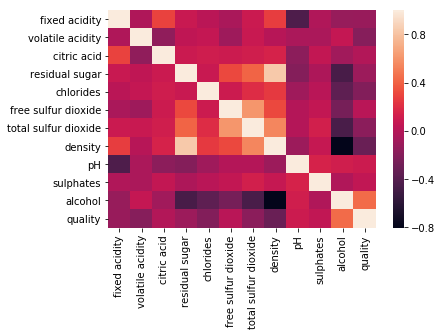

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
#visualizing correlation table
#one multicollinear pair: density and residual sugar
#not enough pairs to take out density or residual sugar --> will keep both

In [18]:
y=df['quality']
X=df.drop(columns=['quality'])
print(X.shape)
print(y.shape)
#predictors and outcome 

(4893, 11)
(4893,)


In [26]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

svr = svm.SVR(kernel='linear',C=1)
svr.fit(train_X,train_y)
pred_y = svr.predict(valid_X)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, pred_y)))
#splitting for training and validating
#normalizing data
#Support Vector Machines used

Root Mean Squared Error: 0.7263087635176013


In [27]:
all_accuracies = cross_val_score(svr, X=train_X, y=train_y, cv=10) # check model name and number of folds

print(all_accuracies) # print accuracy for each fold
print(all_accuracies.mean()) # print mean of accuracies for all folds
print(all_accuracies.std()) # print SD for mean of all accuracies

[0.27788205 0.2955304  0.30923896 0.28190371 0.22095945 0.21418381
 0.25725164 0.26150965 0.35454531 0.31826895]
0.27912739347145743
0.04098177448532126


In [28]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=0)
logit = LinearRegression()
logit.fit(train_X, train_y)
pred_y = logit.predict(valid_X)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, pred_y)))
#linear regression on data

Root Mean Squared Error: 0.7247836182129064


In [29]:
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance
scaler.fit(train_X) # z = (x - u) / s -- z-scores = (value - mean)/SD

train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

logit = LinearRegression()
logit.fit(train_X, train_y)
y_pred = logit.predict(valid_X)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
#normalized linear regression

Root Mean Squared Error: 0.7247836182129063


In [30]:
from sklearn.model_selection import cross_val_score # import library to conduct cross-validation 
# specify your instance and number of folds. Rule of thumb 5 or 10 (might take longer to calculate)

all_accuracies = cross_val_score(estimator=logit, X=train_X, y=train_y, cv=10) # check model name and number of folds

print(all_accuracies) # print accuracy for each fold
print(all_accuracies.mean()) # print mean of accuracies for all folds
print(all_accuracies.std()) # print SD for mean of all accuracies

[0.28376401 0.29558096 0.30660919 0.28360871 0.23030936 0.21204806
 0.27546747 0.25715538 0.35553293 0.32505307]
0.2825129130847369
0.0403471298573455


In [31]:
# Let's see if we can achive better results by using another algorithm

from sklearn.neighbors import KNeighborsRegressor

# Instantiating and training

knn_reg = KNeighborsRegressor(n_neighbors = 5) # number of neighbors to consider 
# There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
knn_reg.fit(train_X, train_y)
y_pred = knn_reg.predict(valid_X)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
#KNN used

Root Mean Squared Error: 0.6961161229821855


In [32]:
knn_reg = KNeighborsRegressor(n_neighbors = 12) # number of neighbors to consider 
# There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
knn_reg.fit(train_X, train_y)
y_pred = knn_reg.predict(valid_X)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))

Root Mean Squared Error: 0.6887932336194861


In [ ]:
#KNN model reduced RMSE from 0.78 to 0.69
#concluding that KNN model is effective for this homework, although more work can be done to decrease RMSE